# COGS 108 - Final Project 

# Overview

Over the last several days, I have decided to take a closer look and analysis on data covering 18466 different food businesses in the North Carolina area. Through the analysis I attempt to discover any significant correlations between the health inspection scores and the amount of money individuals make within different zipcodes. By conducting my research, I hope to better understand how economic income may play a role in the performance of hygiene within businesses. Later I go on to conclude that the datasets provided do not show a close enough correlation to suggest that there is any significant relationship between the Per Capita Income of a food business's area and the Score it recieves from a Health Inspection.

# Name & GitHub

- Name: Benedict Tannady
- GitHub Username: btannady

# Research Question

Does the per capita income of a North Carolina food business correlate with the business’s health inspection score performance?


## Background and Prior Work

In terms of research and data collection previously conducted in regards to food businesses, *North Carolina Department of Agriculture & Consumer Services* states that, food safety specialists are sent to different food distributors and manufacturers to validate that any food products expected to be consumed by humans are properly produced under "sanitary conditions, properly labeled, stored, distributed and held under sanitary conditions". With this in mind, all the food businesses included in the data used within this research study have previously been inspected and graded in the past. The purpose of these regulations being set in place are to ensure that all of the food products being disributed by food businesses are safe for consumption and comply to necessary guidelines. As such, any businesses that are unsuccessful in meeting these guidelines are publicly shunned for lacking in sufficient hygiene protocols. Thus, it is quite essential for successful businesses categorized in the food industry to make sure that they have a proper food safety regulations and hygiene. 

Furthermore, when discussing a business's success model, it can be said that many benefits in thriving business is that they begin earning higher profits. When a business is doing good, the location worth of that business's property can also correspondingly go up as well. However, although it can be said that successful food businesses are both fairly hygenic and earn a plenitude of income, are these two variables correlated? 

This is where this research study comes in. Although it is already understood that health inspections are carried out all around North Carolina food businesses, we do not currently know if there is a direct correlation between the food business's health inspection performance and the property value of the neighborhood. My goal in this research study is to better understand how these two variables may possibly correlate with one another and what are some probable explanations.



source: http://ncagr.gov/fooddrug/food/inspections.htm


# Hypothesis


I believe that the amount of Per Capita Income that a region has, correlates with the food business in that area receiving a higher grade in their health inspection score. My reasoning for this is that poorer neighborhoods are probably less sanitary that wealthier neighborhoods because they don't have as much of a money budget to spend on routine hygenic operations. This would therefore result in the businesses located in poorer neighborhoods to more frequently get a lower health inspection score than wealthier neighborhoods.

# Dataset(s)

#### Dataset Name: inspections.csv
- Link to the dataset: *provided by Prof. Ellis*
- Number of observations: 3 (name, score, zip)

This dataset contains numerous sets of details in regards to health inspection performance on different food businesses within the North Carolina area. This research mainly only focuses on this dataset's 'score' and 'zip' information, but 'name' is also used as a means to stay organized along the way.

#### DatasetName: zipcodes.csv
- Link to the dataset: *provided by Prof. Ellis*
- Number of observations: 2 (zip, per_capita_income_dollars)

This dataset contains numerous sets of details in regards to the economic worth of different location properties. In this research study, we will only be focusing on the 'per_capita_income_dollars' and 'zip' information as a means to analyze the wealth of the different neighborhoods.

After cleaning, simplifying, and organizing the two datasets that we will be using in this research study, we will then combine them together to form one cohesive and combined dataset. The final dataset will have rows of unique zipcodes, and two columns containing 'score' and 'per_capita_income_dollars' information.

# Setup

In [1]:

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 10
pd.options.display.max_columns = 49

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)


# Data Cleaning

Let's first discuss our plan in organizing/cleaning our datasets and how we will attempt to test our hypothesis. 

##### In answering our research question, we must first find and analyze two main values:
    - Health Inspection Scores of food businesses located within a certain region (organized by zipcode)
    - Per Capita Income Dollars earned by residents located within a certain region (organized by zipcode)
        
1. In obtaining each of our main values, we will have to go through the same process for their datasets. First we must remove missing data so we don't skew our calculations down the line. 


2. After removing missing data, we need to remove unnecessary columns in the dataset that we don't need in answering our research question. By doing this, we reduce including columns that distract away from our main research. 


3. After we have our simplified datasets (score dataset & per_capita_income_dollars dataset), we can now attempt to merge them together to form one combined dataset, based on rows with matching zipcodes.


4. Additionally, we should then order our combined dataset so it can be observed more effectively. We can just order it in descending order of health inspection scores.


5. Now that we finally have our organized dataset with zipcode, health inspection score, and per capita income dollars, we can now attempt to visually display our data and analyze the patterns of their values. 


Through cleanling our data and simplifying it to show the necessary information within our datasets, I believe we will be able to discover our answer in regards to if a business's health inspection score correlates with the amount of money earned by individuals in that region (per capita income). 



#### Let's start off by obtaining our health inspection score data, of food businesses within a zipcode region.

In [2]:
# Read the dataset that has information on food business's Inspection Score into rs dataframe variable.
rs = pd.read_csv('inspections.csv') 
rs 

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,days_from_open_date,facilitytype,x,y,geocodestatus,zip,type,description,inspectedby,inspection_num,inspector_id,previous_inspection_date,days_since_previous_inspection,previous_inspection_by_same_inspector,score,num_critical,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,3562,Restaurant,-78.59,35.78,M,27610,Inspection,This facility cooks eggs to order in Grill sta...,Melissa Harrison,1,27.0,NaN,NaN,NaN,96.0,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,3062,Restaurant,-78.55,35.79,M,27610,Inspection,NaN,Christopher Walker,1,7.0,NaN,NaN,NaN,98.0,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,1509,Restaurant,-78.55,35.72,M,27610,Inspection,NaN,Anne Bartoli,1,3.0,NaN,NaN,NaN,97.0,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,177,Restaurant,-78.82,35.80,M,27513,Inspection,NaN,Lisa McCoy,1,24.0,NaN,NaN,NaN,99.0,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,1670,Food Stand,-78.30,35.83,M,27597,Inspection,"New rules, www.wakegov.com/food",Christopher Walker,1,7.0,NaN,NaN,NaN,97.0,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18461,4092021142,2016-11-03T00:00:00Z,Sino Wok,5959-1108 Triangle Town Blv,NaN,raleigh,NC,27616,(919) 792-2499,2002-08-19T00:00:00Z,5190,Food Stand,-78.57,35.87,T,27616,Inspection,NaN,Lucy Schrum,10,25.0,2016-06-27T00:00:00Z,129.0,False,93.0,6,13,1.0,4.0,1.00,4.78,4.69,9.86,4.09e+09,4.09e+09,1
18462,4092110100,2016-11-03T00:00:00Z,Weatherstone Elem. Sch. Cafeteria,1000 Olde Weatherstone Way,NaN,cary,NC,27513,(919) 380-6985,1995-09-05T00:00:00Z,7730,Public School Lunchrooms,-78.81,35.79,M,27513,Inspection,NaN,Andrea Anover,9,1.0,2016-09-06T00:00:00Z,58.0,True,97.0,2,3,2.0,5.0,0.75,3.25,5.85,5.97,4.09e+09,4.09e+09,1
18463,4092110487,2016-11-03T00:00:00Z,ALSTON RIDGE ELEMENTARY SCHOOL CAFETERIA,11555 GREEN LEVEL CHURCH RD,NaN,cary,NC,27519,NaN,2009-11-13T00:00:00Z,2547,Public School Lunchrooms,-78.90,35.86,M,27519,Inspection,NaN,Marion Wearing,9,26.0,2016-06-29T00:00:00Z,127.0,False,96.0,3,4,0.0,2.0,0.88,1.75,2.47,3.00,4.09e+09,4.09e+09,1
18464,4092300177,2016-11-03T00:00:00Z,Food Lion #996 Meat Market,7971 FAYETTEVILLE RD,NaN,raleigh,NC,27603-5631,(919) 772-0317,2000-07-01T00:00:00Z,5969,Meat Market,-78.70,35.67,M,27603,Inspection,NaN,Laura McNeill,10,23.0,2016-06-15T00:00:00Z,141.0,False,99.0,1,2,0.0,3.0,1.11,2.00,3.74,4.61,4.09e+09,4.09e+09,1


Nice! Now that we have our inspection dataset saved inside the rs variable (representing business's score), let's clean it of missing data.

In [3]:
# Handle missing data of RELEVANT columns
rs = rs.dropna(how='any', subset=['name', 'score', 'zip'])# Remove all rows from dataframe that have missing data from any columns we care about.
rs

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,days_from_open_date,facilitytype,x,y,geocodestatus,zip,type,description,inspectedby,inspection_num,inspector_id,previous_inspection_date,days_since_previous_inspection,previous_inspection_by_same_inspector,score,num_critical,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,3562,Restaurant,-78.59,35.78,M,27610,Inspection,This facility cooks eggs to order in Grill sta...,Melissa Harrison,1,27.0,NaN,NaN,NaN,96.0,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,3062,Restaurant,-78.55,35.79,M,27610,Inspection,NaN,Christopher Walker,1,7.0,NaN,NaN,NaN,98.0,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,1509,Restaurant,-78.55,35.72,M,27610,Inspection,NaN,Anne Bartoli,1,3.0,NaN,NaN,NaN,97.0,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,177,Restaurant,-78.82,35.80,M,27513,Inspection,NaN,Lisa McCoy,1,24.0,NaN,NaN,NaN,99.0,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,1670,Food Stand,-78.30,35.83,M,27597,Inspection,"New rules, www.wakegov.com/food",Christopher Walker,1,7.0,NaN,NaN,NaN,97.0,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18461,4092021142,2016-11-03T00:00:00Z,Sino Wok,5959-1108 Triangle Town Blv,NaN,raleigh,NC,27616,(919) 792-2499,2002-08-19T00:00:00Z,5190,Food Stand,-78.57,35.87,T,27616,Inspection,NaN,Lucy Schrum,10,25.0,2016-06-27T00:00:00Z,129.0,False,93.0,6,13,1.0,4.0,1.00,4.78,4.69,9.86,4.09e+09,4.09e+09,1
18462,4092110100,2016-11-03T00:00:00Z,Weatherstone Elem. Sch. Cafeteria,1000 Olde Weatherstone Way,NaN,cary,NC,27513,(919) 380-6985,1995-09-05T00:00:00Z,7730,Public School Lunchrooms,-78.81,35.79,M,27513,Inspection,NaN,Andrea Anover,9,1.0,2016-09-06T00:00:00Z,58.0,True,97.0,2,3,2.0,5.0,0.75,3.25,5.85,5.97,4.09e+09,4.09e+09,1
18463,4092110487,2016-11-03T00:00:00Z,ALSTON RIDGE ELEMENTARY SCHOOL CAFETERIA,11555 GREEN LEVEL CHURCH RD,NaN,cary,NC,27519,NaN,2009-11-13T00:00:00Z,2547,Public School Lunchrooms,-78.90,35.86,M,27519,Inspection,NaN,Marion Wearing,9,26.0,2016-06-29T00:00:00Z,127.0,False,96.0,3,4,0.0,2.0,0.88,1.75,2.47,3.00,4.09e+09,4.09e+09,1
18464,4092300177,2016-11-03T00:00:00Z,Food Lion #996 Meat Market,7971 FAYETTEVILLE RD,NaN,raleigh,NC,27603-5631,(919) 772-0317,2000-07-01T00:00:00Z,5969,Meat Market,-78.70,35.67,M,27603,Inspection,NaN,Laura McNeill,10,23.0,2016-06-15T00:00:00Z,141.0,False,99.0,1,2,0.0,3.0,1.11,2.00,3.74,4.61,4.09e+09,4.09e+09,1


The code above handles the missing data by removing any rows that have missing data in any columns that we care about (name, score, zip). Although from closer inspection, you may notice there are still a few columns that contain missing data here and there, it's okay because we will be selecting those columns out of our dataset in the next step anyways. Thus, as long as the 'name', 'score', and 'zip' columns are clean of any missing data, our dataset will not be disrupted. With that in mind, let's move on...

Now that we know there is no missing data left in our rs dataset, let's remove uneccessaary columns from the dataset that we don't need to answer our research question. We can do this by selecting the significant columns that we actually care about: name, score, zip. 

In [4]:
# Clean out irrelevant columns from dataframe, select significant columns.
rs = rs[['name', 'score', 'zip']]
rs

,name,score,zip
0,Cafe 3000 At Wake Med,96.0,27610
1,Overtime Sports Pub,98.0,27610
2,TASTE OF CHINA,97.0,27610
3,Panera Bread #1643,99.0,27513
4,WalMart Supercenter #4499-00 Deli/Bakery,97.0,27597
...,...,...,...
18461,Sino Wok,93.0,27616
18462,Weatherstone Elem. Sch. Cafeteria,97.0,27513
18463,ALSTON RIDGE ELEMENTARY SCHOOL CAFETERIA,96.0,27519
18464,Food Lion #996 Meat Market,99.0,27603


We're almost done with cleaning up our all 18466 business health inspection score data! Since we want to identify our health inspection scores relative to their zipcode locations, we need to organize each inspection score by zipcode. 
This means we will need to average the health inspection scores of all businesses in the same zipcode, so after running this code all zipcodes will be unqiuely displayed only once in the dataset. 

In [5]:
# Organize the averages of inspection score data by zipcode region (duplicates get their data averaged).
rs = rs.groupby(['zip']).mean() 
rs

,score
zip,
27501,94.75
27502,96.37
27511,96.42
27512,95.61
27513,95.66
...,...
27652,94.88
27695,97.94
27709,95.67


Cool! Now just tidy the dataset by ordering the rows from highest to lowest average health inspection scores.

In [6]:
# Order the zipcode regions (in descending order) by their average inspection score
rs = rs.sort_values(by='score', ascending=False)

print('***************Health Inspection Score Based on Zipcode Area***************')
rs

***************Health Inspection Score Based on Zipcode Area***************


,score
zip,
28145,98.33
27522,98.25
27596,98.03
27602,98.02
28587,98.00
...,...
27652,94.88
27501,94.75
27628,94.33


Our health inspection score dataset is finally clean. 
#### Now let's do the same for our per_capita_income_dollars dataset.

In [7]:
# Read the dataset that has informtaion on Per Capita Income Dollars into rz dataframe variable.
rz = pd.read_csv('zipcodes.csv')
rz

,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9
...,...,...,...,...,...,...,...,...
33,27614,119232,94727,45317,3.7,3.3,1.2,16.6
34,27615,98884,78378,44747,4.2,4.2,1.5,19.6
35,27616,60033,56323,24549,11.7,10.6,4.6,52.6
36,27617,98642,76959,49205,2.0,1.3,0.5,30.4


Similar to the previous dataset, let's remove rows with any columns that have missing data.

In [8]:
# Handle missing data of RELEVANT columns
rz = rz.dropna(how='any', subset=['zip', 'per_capita_income_dollars'])# Remove all rows from dataframe that have missing data from any columns we care about.
rz

,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9
...,...,...,...,...,...,...,...,...
33,27614,119232,94727,45317,3.7,3.3,1.2,16.6
34,27615,98884,78378,44747,4.2,4.2,1.5,19.6
35,27616,60033,56323,24549,11.7,10.6,4.6,52.6
36,27617,98642,76959,49205,2.0,1.3,0.5,30.4


We ended up not removing any rows because there wasn't any missing data in the dataset. However, it's still a good habit to always check. 

Now let's move on. Our dataset still has a lot of other information we don't actually need, let's select the columns we actually care about in answering our research question: zip, per_capita_income_dollars.

In [9]:
# Clean out irrelevant columns from dataframe, select significant columns.
rz = rz[['zip', 'per_capita_income_dollars']]
rz

,zip,per_capita_income_dollars
0,27501,21631
1,27502,36763
2,27511,33139
3,27513,41232
4,27518,49865
...,...,...
33,27614,45317
34,27615,44747
35,27616,24549
36,27617,49205


Amazing! Now we only see the variables we care about. Let's finish up by averaging per_capita_income_dollars in the same zipcode area, and then organizing our dataset by zipcode.

In [10]:
# Organize the averages of per_capita_income_dollars data by zipcode region(duplicates get their data averaged)
rz = rz.groupby(['zip']).mean()
rz

,per_capita_income_dollars
zip,
27501,21631
27502,36763
27511,33139
27513,41232
27518,49865
...,...
27614,45317
27615,44747
27616,24549


Finally, let's finish off our per_capita_income_dollars dataset by ordering the rows by descending Per Capita Income Dollars.

In [11]:
# Order the zipcode regions (in descending order) by their average per_capita_income_dollars
rz = rz.sort_values(by='per_capita_income_dollars', ascending=False)

print('***************Per Capita Income Dollars Based on Zipcode Area***************')
rz

***************Per Capita Income Dollars Based on Zipcode Area***************


,per_capita_income_dollars
zip,
27608,59155
27518,49865
27617,49205
27519,45778
27614,45317
...,...
27592,23355
27501,21631
27597,21573


Now we have finished cleaning both our Health Inspection Score dataset 'rs' and our Per Capita Income Dollars dataset 'rz'.

#### Let's merge our two cleaned datasets into one combined dataset...

In [12]:
mergedData = pd.merge(rs, rz, on = 'zip')
mergedData

,score,per_capita_income_dollars
zip,,
27522,98.25,25513
27596,98.03,26241
27520,97.71,25628
27518,97.23,49865
27529,97.03,25807
...,...,...
27604,95.51,25532
27562,95.28,31161
27617,95.26,49205


Finish off by ordering our rows in descending order by health inspection score.

In [19]:
# Order the zipcode regions (in descending order) by their health inspection score.
mergedData = mergedData.sort_values(by='score', ascending=False)

print('***************Health Inspection Score & Per Capita Income Based on Zipcode Area***************')
mergedData

***************Health Inspection Score & Per Capita Income Based on Zipcode Area***************


,score,per_capita_income_dollars
zip,,
27522,98.25,25513
27596,98.03,26241
27520,97.71,25628
27518,97.23,49865
27529,97.03,25807
...,...,...
27604,95.51,25532
27562,95.28,31161
27617,95.26,49205


# Data Analysis & Results

We have successfully cleaned and organized all the data that we need in answering our research question. We can help our understanding of our data values by displaying our data values through visualizations as well as showing any significant patterns that are noticeable. 

In [21]:
mergedData.describe()

,score,per_capita_income_dollars
count,37.00,37.00
mean,96.36,33223.14
std,0.78,9989.66
min,94.75,17363.00
25%,95.66,25532.00
50%,96.42,31161.00
75%,96.80,41232.00
max,98.25,59155.00


Now the time has come where we get our answer of whether or not there is a direct correlation between a business's health inspection score performance and the neighborhood's per capita income. 

If our hypothesis is correct, then by graphing the 'score' and 'per_capita_income_dollars' against eachother in a scatterplot, we should be able to see a linear model.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


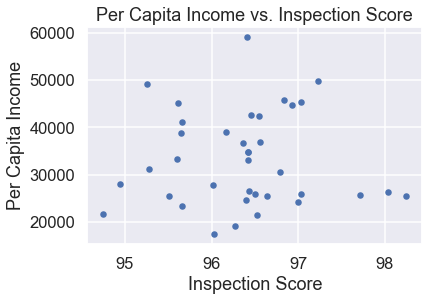

In [22]:
# Scatterplot (inspection scores to per_capita_income_dollars)
displayScatterPlot = mergedData.plot(kind='scatter', x='score', y='per_capita_income_dollars', style=['o', 'rx'], s=25)
_ = plt.title("Per Capita Income vs. Inspection Score")
_ = plt.xlabel('Inspection Score')
_ = plt.ylabel('Per Capita Income')

Interesting. As show in the scatterplot above, there doesn't seem to be any particular linear pattern within our dataset. Keeping in mind that we are currently observing the 'averaged Health Inspection Scores of food businesses' relative to 'averaged Per Capita Income' by zipcode region, we can suggest that our hypothesis appears to be false. All the points shown in the scatterplot are quite distributed and don't show any signs of a pattern. Though to be fair, after all the data cleaning and the way we had to average out all our data into rows of *zipcodes*, we only really had 37 rows remaining in our final dataset. Perhaps with further data containing a higher amount of different zipcodes, we may have ended up with different results. However, in terms of the datasets in which we currently have from 'inspections.csv' and 'zipcodes.csv', there is no correlation between Per Capita Income and Inspection Score.

Taking a closer look at the credibility of each of our main values, we can observe the frequency in which different Inspection Scores appear.

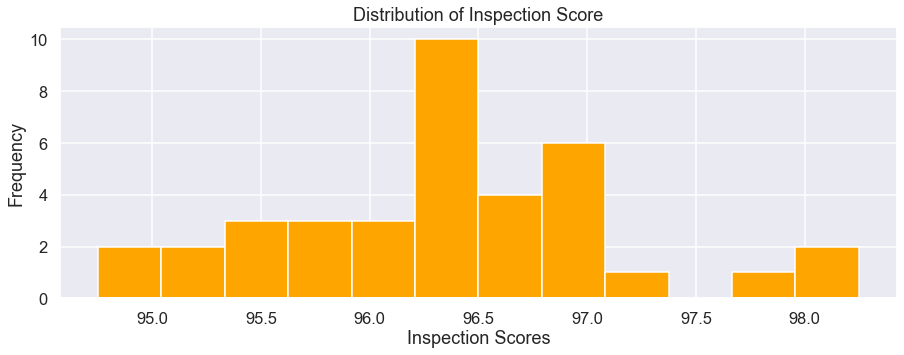

In [15]:
# Histogram (distribution of inspection scores)
_ = plt.figure(figsize=(15,5))
_ = plt.title("Distribution of Inspection Score")
_ = plt.hist(mergedData['score'], color='orange', bins=12)
_ = plt.xlabel('Inspection Scores')
_ = plt.ylabel('Frequency')

As shown in the histogram above, the average Inspection Score stays around 96.4 give or take. Additionally, when observing the structure of the histogram, we can also notice that it doesn't appear to be particularly skewing towards the left or the right. But honestly it's a bit hard to tell if it's well distributed because there's so little data. If the dataset provided had contained more data in regards to zipcodes, then perhaps we may have seen a different outcome. Though if I had to give an answer, the histogram is for the most part fairly balanced in terms of distribution. From this visualization we can suggest that we had a somewhat fair dataset that was not one-sided towards a specific side, but rather center skewed.

Similar to the previous histogram, we can perform the same kind of analysis on our Per Capita Income Dollars to better understand whether the distribution of our dataset seem realistic.

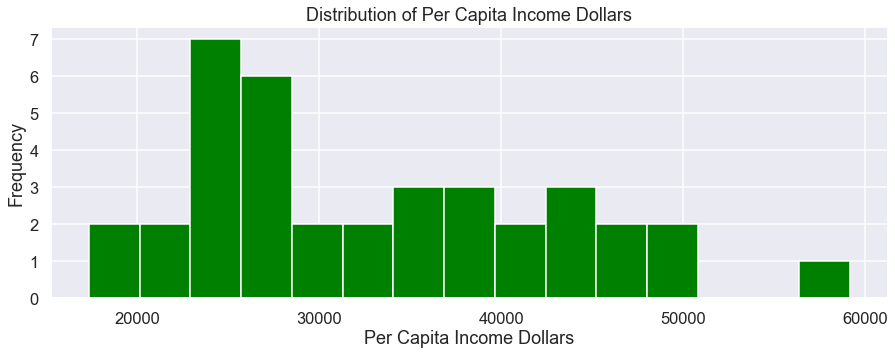

In [16]:
# Histogram (distribution of analysis neighborhoods)
_ = plt.figure(figsize=(15,5))
_ = plt.title("Distribution of Per Capita Income Dollars")
_ = plt.hist(mergedData['per_capita_income_dollars'], color='green', bins=15)
_ = plt.xlabel('Per Capita Income Dollars')
_ = plt.ylabel('Frequency')

Based on the above histogram of the the dataset in regards to frequency of Per Capita Income Dollars, we can make several observations of its distribution and credibility. The visualization suggests that Per Capita Income Dollars are a litle bit skewed towards the right. However, this makes sense because income levels within the economy are usually never really centered and evenly spread out anyways. By this I mean that when comparing the ratio of poor people to rich people, it is commonly known that there are typically a lot more poor people than rich people. So given the slightly skewed distributions that the Per Capita Income histogram shows, we can suggest that it makes sense and appears to be realistic. 

# Ethics & Privacy


Since all of the datasets used for this research investigation were provided by my UC San Diego data science professor, Shannon Ellis, all of the data in the datasets used were already made public. I had permission to use this data and it was made publicly made available to me on the internet. As of this moment, there does not seem to be any relevant privacy concerns regarding my data. Most of the data is already information that would typically be made public anyways, so nothing unlawful is being done.

Possible biases could be that there may be other variables that could play a role in a food business's health inspection score. Although, I believe that a counterargument could be that if the data shows a relevant enough of a pattern, then it can be safe to say that there is or is not a correlation with health inspection scores and a location's per capita income. 

Possible issues regarding my data would be 'underrepresentation' of all the different food businesses within the area. As of this moment, I am not fully aware whether every single restaurant and food business in the North Carolina area have had their health inspection performance made public. Additionally, I similarly cannot fully comment on whether every single zipcode within the North Carolina area has also made their income data public, although I would assume they would. With all this in mind, I'd really only be able to compare data and make an analysis based on the datasets made publicly avaiable to me. So although this data may suggest a particular outcome and answer to our research question, it is subject to change depending on the datasets provided to me.

Overall, the datasets two datasets that I extract information from, 'inspections.csv' and 'zipcodes.csv', should serve useful for now. In the future, I may need to independently look deeper for better datasets though. An alternate solution could also be in expanding the geographic range of my research question to not only be limited to the North Carolina area, but instead an entire contindent of zipcodes. By doing this, we'd more than likely have enough data to conduct a more thorough experiment. Though I'd imagine expanding the range of the research would sprout up its own issues. Anyways, there aren't any relevant privacy concerns as all the datasets I am using have already been made public.


# Conclusion & Discussion

In conclusion, our hypothesis failed to be proven true based on the data that we had tested in our research study. We had tested our research question by pinning the health inspection scores and per capita income relevant to each zipcode location that food businesses were. However, after conducting further analysis we could clearly identify that there weren't any signs of a linear pattern appearing in their visualizations. Looking further into this, there can be several explanations in regards to our results.

Lack of data. Perhaps if this research study had a larger resource of data then our results would look differently. Due to how the pairing, matching, and averaging of the data values, the final dataset really only had 37 different zipcodes to compare against eachother. With this in mind, I personally believe that next time I'd like to conduct the research with a larger dataset. As this was an independent research project and I had to use the datasets that were provided to me, I didn't really have a choice in this matter. However, it would definetely be more beneficial if the datasets provided were more diverse in terms of having different zipcodes. If there were more zipcode values, then there would similarly be a lot more rows and comparisons being made against eachother. Although the datasets provided did have plenty of *other* kinds of data information, in terms of answering this specific question, there wasn't as much data as I wish there was; most specifically, zipcodes. 

Overall this was an interesting research question to learn more about. I was highly motivated because I had a personal drive in answering my query. Although the question was eventually answered and proven to go against my initial hypothesis, I'd like to test this again in the future under better conditions. I currently am living back home in the Bay Area so it'd be interesting to try testing if San Francisco would produce similar results as this experiment. I had a ton of fun in conducting this entire research study on my own and this was very inspiring despite me being proven wrong haha. 


